In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

odeint solves first-order ordinary differential equations of the form:
    
$$ \frac{\mathrm{d}y}{\mathrm{d}t} = f(y, t) $$

Lets consider a simple example where $f(y, t) = - k y$    

(analytically:  $y(t) = y_0 e^{-k t}$ )

In [5]:
k = 0.1
y0 = 200

t = np.linspace(0, 50, 51)

y = odeint(lambda y, t: -k*y, y0, t)


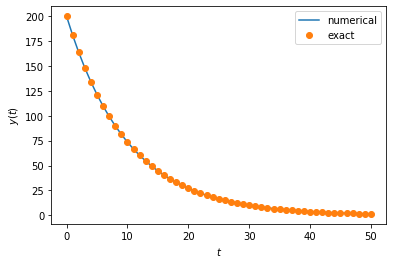

In [6]:
##let's compare the exact and numerical results
fig, ax=plt.subplots()
ax.plot(t, y, label='numerical')
ax.plot(t, y0*np.exp(-k*t), 'o', label='exact')
ax.set_ylabel(r'$y(t)$')
ax.set_xlabel(r'$t$')
ax.legend()
plt.show()


For coupled, or higher-order ODEs?

odeint takes a tuple of y0, returns tuples for each time step, and requires a function that gives a tuple return...

For example: the Harmonic Oscillator $ \frac{\mathrm{d}^2 y}{\mathrm{d} t^2} = - \omega^2 y$ is a second-order ODE, but can be written as a pair of coupled 1st order ODES

$$ \frac{\mathrm{d} y_1}{\mathrm{d} t} = y_2 $$

$$ \frac{\mathrm{d} y_2}{\mathrm{d} t} =  - \omega^2 y_1$$

where $y_1=y$ and $y_2 = \frac{\mathrm{d}y}{\mathrm{d}t}$

In [7]:
omega = 1

y0 = 3, 0                      #i.e y1(0) = 3, y2(0) = 0

t=np.linspace(0, 20, 100)

def dydt(y, t, omega):
    y1, y2 = y                  # unpack the tuple
    dy1dt = y2
    dy2dt = -omega**2 * y1
    return dy1dt, dy2dt         # return a tuple of values

y1, y2 = odeint(dydt, y0, t, args=(omega,)).T   

#why the T? easiest way to get lists of y1, y2 and not tuples for each time step!

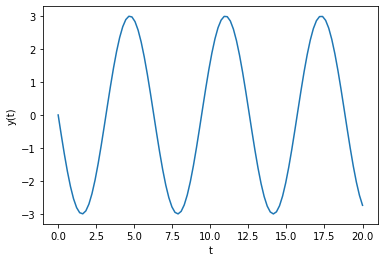

In [16]:
fig2, ax = plt.subplots()
ax.plot(t, y2)
ax.set_ylabel('y(t)')
ax.set_xlabel('t')
plt.show()

In [9]:
y1, y2

(array([ 3.        ,  2.93898968,  2.7584402 ,  2.46569522,  2.07266165,
         1.59532557,  1.05310197,  0.46804498, -0.13604906, -0.73460952,
        -1.3032908 , -1.81896262, -2.26065076, -2.61039026, -2.85395594,
        -2.98144109, -2.98766045, -2.87236105, -2.64023254, -2.3007164 ,
        -1.86762197, -1.35856474, -0.79424986, -0.19763003,  0.4070281 ,
         0.99513097,  1.54275837,  2.02763631,  2.43004308,  2.73361137,
         2.925994  ,  2.99936608,  2.9507433 ,  2.78210333,  2.50030534,
         2.11681106,  1.64721856,  1.11062782,  0.52886391, -0.07441076,
        -0.67465889, -1.24746626, -1.76953475, -2.21962998, -2.57944499,
        -2.83434481, -2.97396178, -2.99261718, -2.88955221, -2.6689589 ,
        -2.33980957, -1.91549187, -1.41326434, -0.85355435, -0.25912728,
         0.34583942,  0.93673961,  1.48953928,  1.98175411,  2.39336395,
         2.70762724,  2.91176172,  2.9974645 ,  2.96124977,  2.80459051,
         2.53385859,  2.16006565,  1.69841519,  1.1

In [13]:
y1, y2 = odeint(dydt, y0, t, args=(omega,))


ValueError: too many values to unpack (expected 2)